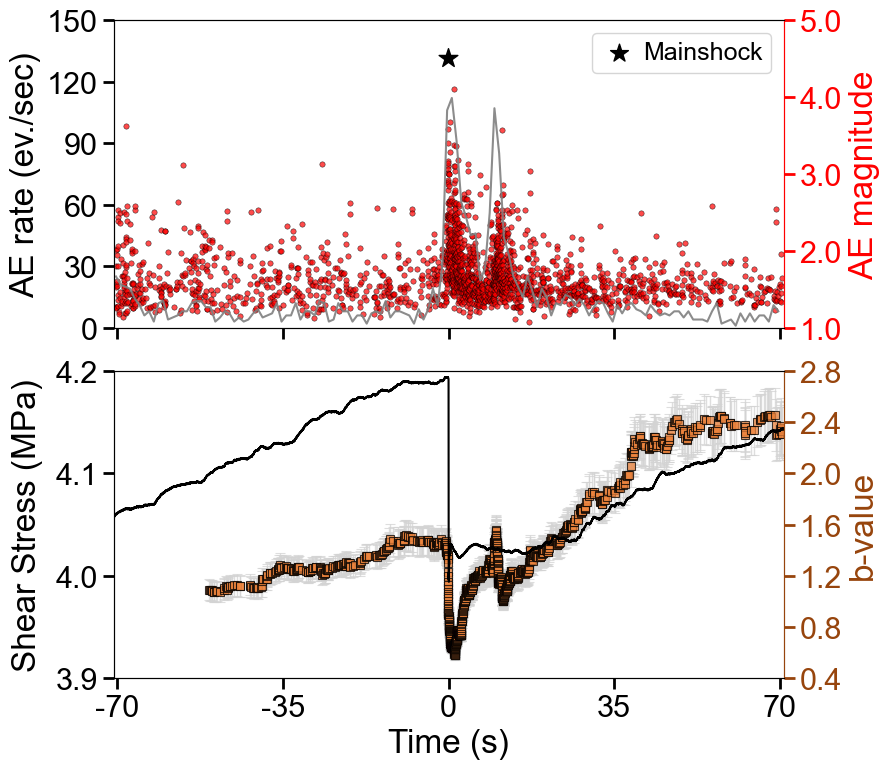

In [1]:
###b值的时域分布  Mc=1.5
import numpy as np
import pandas as pd
import scipy.io as sio
import os
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator 
import matplotlib.gridspec as gridspec 
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size']  = 8
plt.rcParams['xtick.minor.size']  = 4
plt.rcParams['ytick.major.size']  = 8
plt.rcParams['ytick.minor.size']  = 4

## stress and disp
shear = sio.loadmat("shear.mat")["shear"][:,0]
disp = sio.loadmat("disp.mat")["disp"][:,0]
times = sio.loadmat("time.mat")["time"][0]
# shears = shear[416460-7080:416460+7080]
# timess = times[416460-7080:416460+7080]
# timess = timess-4164.6

shears = shear[429634-7080:429634+7080]
timess = times[429634-7080:429634+7080]
timess = timess-4296.34

# strs="143711"
# pth = "E:/NEW/AE_bagging" os.path.join(pth, "ckpt/"+strs+"/mag_result.csv").replace("\\","/")
path = "143711_mag_result.csv"
data=np.array(pd.read_csv(path, header=None, encoding="utf-8"))  #(3*n)  时间， 震级， dB值
m_s = np.around(data[1],1)  #震级的数据int(np.ceil(M_sum.shape[0]/400))
t_s = data[0]

# AE rate
num=[]
for i in range(141):
    index = np.where((data[0]>=i)&(data[0]<=i+1))
    num.append(len(index[0]))

##b值
index=np.where(m_s<1.5)      #震级小于1.5的索引
index=np.array(index)[0,:]   
m_sd = np.delete(m_s, index, axis=0)  #删除震级小于1.5的索引
t_sd = np.delete(t_s, index, axis=0 )  #删除后的时间

s1=[]
for j in range(m_sd.shape[0]):
    s1.append((m_sd[j]-np.mean(m_sd))**2)
std = np.sqrt(np.sum(s1)/(m_sd.shape[0]*(m_sd.shape[0]-1)))


b=[]
time=[]
erro=[]
nums = []
ns=150
m_s1 = []
m_s2 = []

##另一种
b1=[]

ct =[]
for i in range(2000):
    m = m_sd[(0+1*i):(ns+1*(i))]
    t = t_sd[(0+1*i):(ns+1*(i))]
    
    ms=sum(abs(np.diff(m)))/len(m)
    m_s1.append(ms)
    m_ss = sum(m_s1)/len(m_s1)
    m_s2.append(np.median(m_s1))
    
    if t.shape[0] <ns:
        break
    nums.append(t.shape[0])
    time.append(t[-1])
    erro.append((np.log10(np.e)/(np.mean(m)-1.5+0.05))/np.sqrt(m.shape[0]))
    b.append(np.log10(np.e)/(np.mean(m)-1.5+0.05))
    
    bs = np.log10(np.e)/(np.mean(m)-1.5+0.05)
    
    ct.append(np.log10(np.e)*0.05/((np.mean(m)-1.5)*(np.mean(m)-1.5+0.05)))
   
    s1=[]
    for j in range(m.shape[0]):
        m_ave = np.mean(m)
        s1.append((m[j]-m_ave)**2)
    std = np.sqrt(np.sum(s1)/(m.shape[0]*(m.shape[0]-1)))
    std_e = 2.30*bs**2*std
    b1.append(std_e)
        
time=np.nan_to_num(time, nan=0)
erro=np.nan_to_num(erro, nan=0)
b=np.nan_to_num(b, nan=0)

time=np.delete(time, np.where(time==0))
erro=np.delete(erro, np.where(erro==0))
b=np.delete(b, np.where(b==0))

##主震点
inx = np.where(data[1]==np.max(data[1]))
tm = data[0][inx][0]
eqr= np.max(data[1])

colors=["red", "sandybrown", "saddlebrown", "peru", "#EE853E", "#97450D"]
## 画图
gs = gridspec.GridSpec(2, 1)
fig = plt.figure(1, figsize=(9,7.8), dpi=100) 
ax = fig.add_subplot(gs[1, 0])
ax.plot(timess, shears, c="k", lw=1.5)
ax.set_xlim([-70.8, 70.8])
ax.set_ylim([3.9, 4.2])
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
ax.tick_params(axis='both', labelsize=22)
ax.set_zorder(2)
ax.set_facecolor('none')
ax.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
# ax.xaxis.set_ticklabels([])
ax.set_ylabel('Shear Stress (MPa)', fontsize=24, labelpad=9)
ax.set_xlabel('Time (s)', fontsize=24)
ax.spines['right'].set_color('#97450D')
ax.set_facecolor('none')

ax1 = ax.twinx()
ax1.errorbar(time-70.3164, b, yerr=b1, ls="none", lw=1.6, ecolor='lightgrey', elinewidth=1.0, capsize=3.5, capthick=2, marker='s', mec="k", mew=0.80, mfc="#EE853E", ms=6.0, alpha=0.75)   #tomato
#ax1.plot(time+4094, b, lw=2,c="#EE853E",)
# ax1.scatter(-24.8493301321107+4094+70.1164, 1.5079669510529579, zorder=3)
# ax1.scatter(-9.655758110770641+4094+70.1164, 1.33492156322721, zorder=3)
ax1.set_ylim([0.4, 2.8])
ax1.set_xlim([-70.8, 70.8])
ax1.set_zorder(1)
ax1.tick_params(axis='both', labelsize=22)
ax1.set_ylabel('b-value', fontsize=24)
y_major_locator=MultipleLocator(0.4)
ax1.yaxis.set_major_locator(y_major_locator)
ax1.spines['right'].set_color('#97450D')
ax1.tick_params(axis='y', which='both',colors='#97450D')
ax1.yaxis.label.set_color('#97450D')


ax3 = fig.add_subplot(gs[0, 0])
ax3.plot(np.arange(len(num))-70.3164, num, c="gray", lw=1.5,alpha=0.9)
ax3.set_ylim([0, 150])
ax3.set_xlim([-70.8, 70.8])
ax3.tick_params(axis='both', labelsize=22)
y_major_locator=MultipleLocator(30)
ax3.yaxis.set_major_locator(y_major_locator)
ax3.set_ylabel('AE rate (ev./sec)', fontsize=24)
ax3.set_zorder(2)
ax3.spines['right'].set_color(colors[0])
ax3.set_facecolor('none')


ax2 = ax3.twinx()
ax2.scatter(data[0]-70.3164,data[1], c=colors[0], edgecolor = "k", s=15, alpha=0.7, lw=0.4)
s1=ax2.scatter(tm-70.3164, eqr, c="k", s=200, marker="*", edgecolor = "k", lw=1.0, zorder=3)
ax2.set_xlim([-70.8, 70.8])
ax2.set_ylim([1.0, 5.0])
x_major_locator=MultipleLocator(35)
ax2.xaxis.set_major_locator(x_major_locator)
y_major_locator=MultipleLocator(1)
ax2.yaxis.set_major_locator(y_major_locator)
ax2.tick_params(axis='both', labelsize=22)
ax2.set_ylabel('AE magnitude', fontsize=24, labelpad=5)
ax2.set_zorder(1)
ax2.set_facecolor('none')
ax2.set_yticks([1, 2, 3, 4, 5], labels=['1.0', '2.0',  '3.0',  "4.0",  "5.0"])
ax2.xaxis.set_ticklabels([])
ax2.spines['right'].set_color(colors[0])
ax2.tick_params(axis='y', which='both',colors=colors[0])
ax2.yaxis.label.set_color(colors[0])
ax2.legend([s1],['Mainshock'] ,loc =0, fontsize=18,handlelength=1.5, handletextpad=0.2,borderpad=0.35,markerscale=0.95)


plt.subplots_adjust(wspace=0.15,hspace=0.11)
plt.tight_layout()
# plt.savefig("E1_shear.png", dpi=800)

# t1=time-70.3164
# inx = np.where(t1<0)[0]
# t1=t1[inx]
# b1 = b[inx]
# inx1=np.where(b1>1.504)[0]
# t1[inx1]

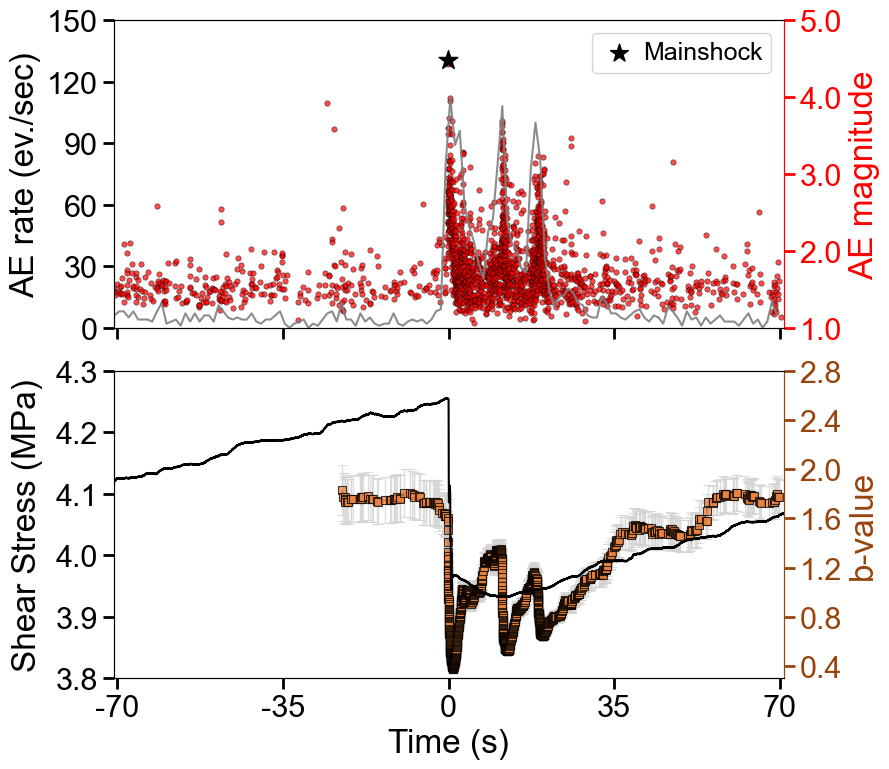

In [48]:
###b值的时域分布  Mc=1.5
import numpy as np
import pandas as pd
import scipy.io as sio
import os
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator 
import matplotlib.gridspec as gridspec 
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size']  = 8
plt.rcParams['xtick.minor.size']  = 4
plt.rcParams['ytick.major.size']  = 8
plt.rcParams['ytick.minor.size']  = 4


## stress and disp
shear = sio.loadmat("shear.mat")["shear"][:,0]
disp = sio.loadmat("disp.mat")["disp"][:,0]
times = sio.loadmat("time.mat")["time"][0]
# shears = shear[429620-7080:429620+7080]
# timess = times[429620-7080:429620+7080]
# timess = timess-4296.2
shears = shear[442466-7080:442466+7080]
timess = times[442466-7080:442466+7080]
timess = timess-4424.66

# strs="143922"
# pth = "E:/NEW/AE_bagging"
path = "143922_mag_result.csv"         #os.path.join(pth, "ckpt/"+strs+"/mag_result.csv").replace("\\","/")
data=np.array(pd.read_csv(path, header=None, encoding="utf-8"))  #(3*n)  时间， 震级， dB值
m_s = np.around(data[1],1)  #震级的数据int(np.ceil(M_sum.shape[0]/400))
t_s = data[0]

## AE rate
num=[]
for i in range(141):
    index = np.where((data[0]>=i)&(data[0]<=i+1))
    num.append(len(index[0]))

##b值
index=np.where(m_s<1.5)      #震级小于1.5的索引
index=np.array(index)[0,:]   
m_sd = np.delete(m_s, index, axis=0)  #删除震级小于1.5的索引
t_sd = np.delete(t_s, index, axis=0 )  #删除后的时间

b=[]
time=[]
erro=[]
nums=[]
ns=150
m_s=[]

##另一种
b1=[]
for i in range(2000):
    m = m_sd[(0+1*i):(ns+1*(i))]
    t = t_sd[(0+1*i):(ns+1*(i))]
    
    ms=sum(abs(np.diff(m)))/len(m)
    m_s.append(ms)
    m_ss = sum(m_s)/len(m_s)
    
    if t.shape[0] <ns:
        break
    nums.append(t.shape[0])
    time.append(t[-1])
    erro.append((np.log10(np.e)/(np.mean(m)-1.5+0.05))/np.sqrt(m.shape[0]))
    b.append(np.log10(np.e)/(np.mean(m)-1.5+0.05))
    
    bs = np.log10(np.e)/(np.mean(m)-1.5+0.05)
   
    s1=[]
    for j in range(m.shape[0]):
        m_ave = np.mean(m)
        s1.append((m[j]-m_ave)**2)
    std = np.sqrt(np.sum(s1)/(m.shape[0]*(m.shape[0]-1)))
    std_e = 2.30*bs**2*std
    b1.append(std_e)

time=np.nan_to_num(time, nan=0)
erro=np.nan_to_num(erro, nan=0)
b=np.nan_to_num(b, nan=0)

time=np.delete(time, np.where(time==0))
erro=np.delete(erro, np.where(erro==0))
b=np.delete(b, np.where(b==0))

##主震点
inx = np.where(data[1]==np.max(data[1]))
tm = data[0][inx][0]
eqr= np.max(data[1])

num[71]=112
num[82]=108
num[89]=100

colors=["red", "sandybrown", "saddlebrown", "peru", "#EE853E", "#97450D"]

## 画图
gs = gridspec.GridSpec(2, 1)
fig = plt.figure(1, figsize=(9,7.8), dpi=100) 
ax = fig.add_subplot(gs[1, 0])
ax.plot(timess, shears, c="k", lw=1.5)
ax.set_xlim([-70.8, 70.8])
ax.set_ylim([3.8, 4.3])
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
ax.tick_params(axis='both', labelsize=22)
ax.set_zorder(2)
ax.set_facecolor('none')
ax.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
# ax.xaxis.set_ticklabels([])
ax.set_ylabel('Shear Stress (MPa)', fontsize=24, labelpad=9)
ax.set_xlabel('Time (s)', fontsize=24)
ax.set_facecolor('none')
ax.spines['right'].set_color(colors[5])

ax1 = ax.twinx()
ax1.errorbar(time-70.6398, b, yerr=b1, ls="--", lw=1.6,ecolor='lightgrey', elinewidth=1.0, capsize=3.5, capthick=2, marker='s', mec="k", mew=0.80, mfc=colors[4], ms=6.0,alpha=0.75)
# ax1.errorbar(time-70.78, b, yerr=erro, ls="--", lw=1.6,ecolor='lightgrey', elinewidth=1.5, capsize=3, capthick=1.5, marker='s', mec="k",mfc=colors[4], ms=6.0)
#ax1.plot(time+4226, b, lw=2,c="#EE853E",)
# ax1.scatter(-28.0706366349342+4226+70.4398, 1.60256266384964, zorder=3)
# ax1.scatter(-16.623495951758308+4226+70.4398, 1.4573640332323876, zorder=3)
ax1.set_ylim([0.3, 2.8])
ax1.set_zorder(1)
ax1.tick_params(axis='both', labelsize=22)
ax1.set_ylabel('b-value', fontsize=24)
y_major_locator=MultipleLocator(0.4)
ax1.yaxis.set_major_locator(y_major_locator)
ax1.spines['right'].set_color(colors[5])
ax1.tick_params(axis='y', which='both',colors=colors[5])
ax1.yaxis.label.set_color(colors[5])

ax3 = fig.add_subplot(gs[0, 0])
ax3.plot(np.arange(len(num))-70.6398, num, c="gray", lw=1.5,alpha=0.9, zorder=1)
ax3.set_ylim([0, 150])
ax3.set_xlim([-70.8, 70.8])
ax3.tick_params(axis='both', labelsize=22)
y_major_locator=MultipleLocator(30)
ax3.yaxis.set_major_locator(y_major_locator)
ax3.set_ylabel('AE rate (ev./sec)', fontsize=24)
ax3.set_zorder(2)
ax3.set_facecolor('none')
ax3.spines['right'].set_color(colors[0])

ax2 = ax3.twinx()
ax2.scatter(data[0]-70.6398,data[1], c=colors[0], edgecolor = "k", s=15, alpha=0.7, lw=0.4)
s1=ax2.scatter(tm-70.6398, eqr, c="k", s=200, marker="*", edgecolor = "k", lw=1.0, zorder=4)
ax2.set_xlim([-70.8, 70.8])
ax2.set_ylim([1.0, 5.0])
x_major_locator=MultipleLocator(35)
ax2.xaxis.set_major_locator(x_major_locator)
y_major_locator=MultipleLocator(1)
ax2.yaxis.set_major_locator(y_major_locator)
ax2.tick_params(axis='both', labelsize=22)
ax2.set_ylabel('AE magnitude', fontsize=24, labelpad=5)
ax2.set_zorder(1)
ax2.set_facecolor('none')
ax2.set_yticks([1, 2, 3, 4, 5], labels=['1.0', '2.0',  '3.0',  "4.0",  "5.0"])
ax2.xaxis.set_ticklabels([])
ax2.spines['right'].set_color(colors[0])
ax2.tick_params(axis='y', which='both',colors=colors[0])
ax2.yaxis.label.set_color(colors[0])
ax2.legend([s1],['Mainshock'] ,loc =0, fontsize=18,handlelength=1.5, handletextpad=0.2,borderpad=0.35,markerscale=0.95)


plt.subplots_adjust(wspace=0.15,hspace=0.02)
plt.tight_layout()
# plt.savefig("E2_shear.png", dpi=800)

##查找顶点
# t1=time-70.6398
# inx = np.where(t1<0)[0]
# t1=t1[inx]
# b1 = b[inx]
# inx1=np.where(b1>1.8095)[0]
# t1[inx1]

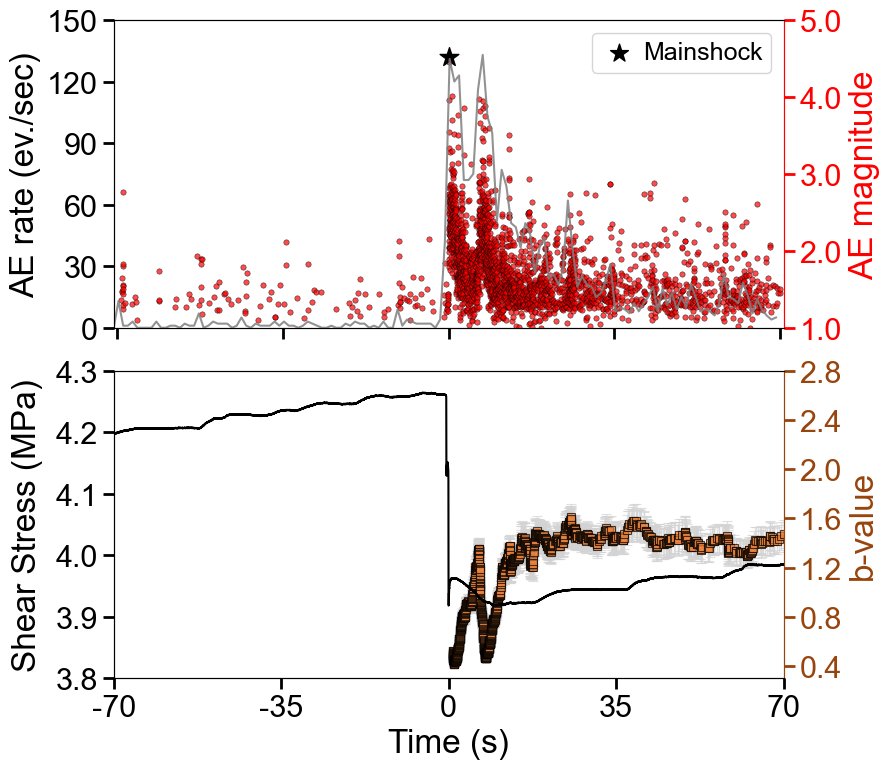

In [58]:
###b值的时域分布  Mc=1.5
import numpy as np
import pandas as pd
import scipy.io as sio
import os
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator 
import matplotlib.gridspec as gridspec 
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size']  = 8
plt.rcParams['xtick.minor.size']  = 4
plt.rcParams['ytick.major.size']  = 8
plt.rcParams['ytick.minor.size']  = 4


## stress and disp
shear = sio.loadmat("shear.mat")["shear"][:,0]
disp = sio.loadmat("disp.mat")["disp"][:,0]
times = sio.loadmat("time.mat")["time"][0]
shears = shear[485060-7080:485060+7080]
timess = times[485060-7080:485060+7080]
timess = timess-4850.6

# strs="144836"
# pth = "E:/NEW/AE_bagging"
path = "144836_mag_result.csv" #os.path.join(pth, "ckpt/"+strs+"/mag_result.csv").replace("\\","/")
data=np.array(pd.read_csv(path, header=None, encoding="utf-8"))  #(3*n)  时间， 震级， dB值
m_s = np.around(data[1],1)  #震级的数据int(np.ceil(M_sum.shape[0]/400))
t_s = data[0]

## AE rate
num=[]
for i in range(141):
    index = np.where((data[0]>=i)&(data[0]<=i+1))
    num.append(len(index[0]))

##b值
index=np.where(m_s<1.5)      #震级小于1.5的索引
index=np.array(index)[0,:]   
m_sd = np.delete(m_s, index, axis=0)  #删除震级小于1.5的索引
t_sd = np.delete(t_s, index, axis=0 )  #删除后的时间

b=[]
time=[]
erro=[]
nums=[]
ns=150

b1=[]
for i in range(2000):
    m = m_sd[(0+1*i):(ns+1*(i))]
    t = t_sd[(0+1*i):(ns+1*(i))]
    if t.shape[0] <ns:
        break
    nums.append(t.shape[0])
    time.append(t[-1])
    erro.append((np.log10(np.e)/(np.mean(m)-1.5+0.05))/np.sqrt(m.shape[0]))
    b.append(np.log10(np.e)/(np.mean(m)-1.5+0.05))
    
    bs = np.log10(np.e)/(np.mean(m)-1.5+0.05)
   
    s1=[]
    for j in range(m.shape[0]):
        m_ave = np.mean(m)
        s1.append((m[j]-m_ave)**2)
    std = np.sqrt(np.sum(s1)/(m.shape[0]*(m.shape[0]-1)))
    std_e = 2.30*bs**2*std
    b1.append(std_e)

time=np.nan_to_num(time, nan=0)
erro=np.nan_to_num(erro, nan=0)
b=np.nan_to_num(b, nan=0)

time=np.delete(time, np.where(time==0))
erro=np.delete(erro, np.where(erro==0))
b=np.delete(b, np.where(b==0))

##主震点
inx = np.where(data[1]==np.max(data[1]))
tm = data[0][inx][0]
eqr= np.max(data[1])

colors=["red", "sandybrown", "saddlebrown", "peru", "#EE853E", "#97450D"]
## 画图
gs = gridspec.GridSpec(2, 1)
fig = plt.figure(1, figsize=(9,7.8), dpi=100) 
ax = fig.add_subplot(gs[1, 0])
ax.plot(timess, shears, c="k", lw=1.5)
ax.set_xlim([-20.8, 20.8])
ax.set_ylim([3.8, 4.3])
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
ax.tick_params(axis='both', labelsize=22)
ax.set_zorder(2)
ax.set_facecolor('none')
ax.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
# # ax.xaxis.set_ticklabels([])
ax.set_ylabel('Shear Stress (MPa)', fontsize=24, labelpad=9)
ax.set_xlabel('Time (s)', fontsize=24)
ax.set_facecolor('none')
ax.spines['right'].set_color(colors[5])

ax1 = ax.twinx()
ax1.errorbar(time-70.7883, b, yerr=b1, ls="--", lw=1.6,ecolor='lightgrey', elinewidth=1.0, capsize=3.5, capthick=2, marker='s', mec="k", mew=0.80, mfc=colors[4], ms=6.0, alpha= 0.70)
ax1.set_ylim([0.3, 2.8])
ax1.set_zorder(1)
ax1.tick_params(axis='both', labelsize=22)
ax1.set_ylabel('b-value', fontsize=24)
y_major_locator=MultipleLocator(0.4)
ax1.yaxis.set_major_locator(y_major_locator)
ax1.spines['right'].set_color(colors[5])
ax1.tick_params(axis='y', which='both',colors=colors[5])
ax1.yaxis.label.set_color(colors[5])

ax3 = fig.add_subplot(gs[0, 0])
ax3.plot(np.arange(len(num))-70.7883, num, c="gray", lw=1.5,alpha=0.85)
ax3.set_ylim([0, 150])
ax3.set_xlim([-70.8, 70.8])
ax3.tick_params(axis='both', labelsize=22)
y_major_locator=MultipleLocator(30)
ax3.yaxis.set_major_locator(y_major_locator)
ax3.set_ylabel('AE rate (ev./sec)', fontsize=24)
ax3.set_zorder(2)
ax3.set_facecolor('none')
ax3.spines['right'].set_color(colors[0])

ax2 = ax3.twinx()
ax2.scatter(data[0]-70.7883,data[1], c=colors[0], edgecolor = "k", s=15, alpha=0.7, lw=0.4)
s1=ax2.scatter(tm-70.7883, eqr, c="k", s=200, marker="*", edgecolor = "k", lw=1.0, zorder=3)
ax2.set_xlim([-70.8, 70.8])
ax2.set_ylim([1.0, 5.0])
x_major_locator=MultipleLocator(35)
ax2.xaxis.set_major_locator(x_major_locator)
y_major_locator=MultipleLocator(1)
ax2.yaxis.set_major_locator(y_major_locator)
ax2.tick_params(axis='both', labelsize=22)
ax2.set_ylabel('AE magnitude', fontsize=24, labelpad=5)
ax2.set_zorder(1)
ax2.set_facecolor('none')
ax2.set_yticks([1, 2, 3, 4, 5], labels=['1.0', '2.0',  '3.0',  "4.0",  "5.0"])
ax2.xaxis.set_ticklabels([])
ax2.spines['right'].set_color(colors[0])
ax2.tick_params(axis='y', which='both',colors=colors[0])
ax2.yaxis.label.set_color(colors[0])
ax2.legend([s1],['Mainshock'] ,loc =0, fontsize=18,handlelength=1.5, handletextpad=0.2,borderpad=0.35,markerscale=0.95)


plt.subplots_adjust(wspace=0.15,hspace=0.11)
plt.tight_layout()
# plt.savefig("E3_shear.png", dpi=800)

# b_e3 = np.vstack((time,b))
# sio.savemat("b_3.mat", {"data":b_e3})

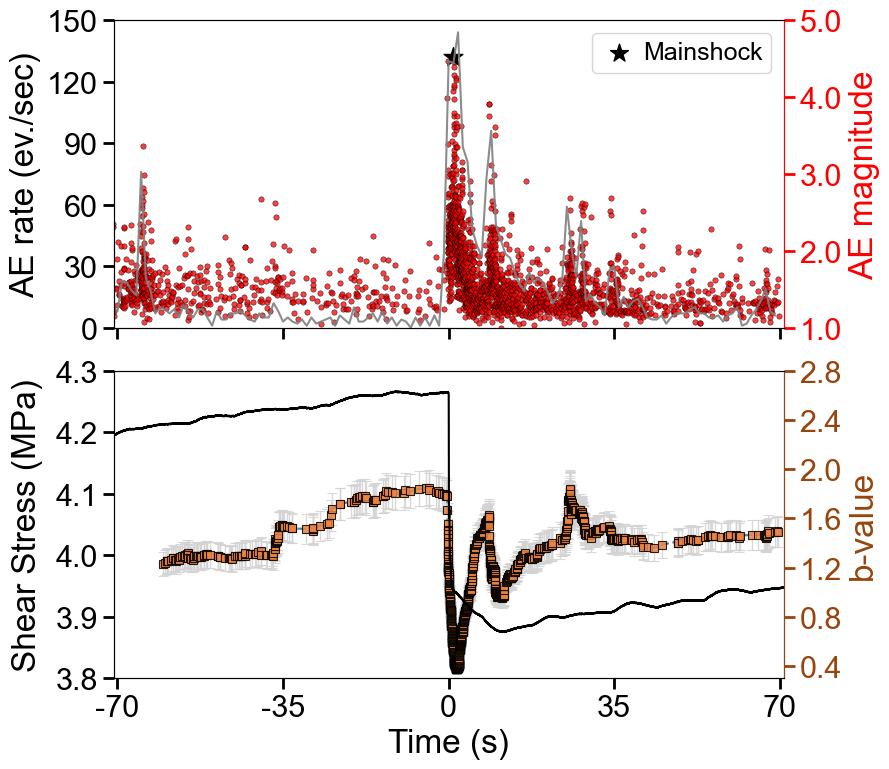

In [5]:
###b值的时域分布  Mc=1.5
import numpy as np
import pandas as pd
import scipy.io as sio
import os
import csv
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator 
import matplotlib.gridspec as gridspec 
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size']  = 8
plt.rcParams['xtick.minor.size']  = 4
plt.rcParams['ytick.major.size']  = 8
plt.rcParams['ytick.minor.size']  = 4


## stress and disp
shear = sio.loadmat("shear.mat")["shear"][:,0]
disp = sio.loadmat("disp.mat")["disp"][:,0]
times = sio.loadmat("time.mat")["time"][0]
shears = shear[519100-7080:519100+7080]
timess = times[519100-7080:519100+7080]
timess = timess-5191.00

# strs="145417"
# pth = "E:/NEW/AE_bagging"
path = "145417_mag_result.csv"   #os.path.join(pth, "ckpt/"+strs+"/mag_result.csv").replace("\\","/")
data=np.array(pd.read_csv(path, header=None, encoding="utf-8"))  #(3*n)  时间， 震级， dB值
data[1][527] = data[1][527]

m_s = np.around(data[1],1)  #震级的数据int(np.ceil(M_sum.shape[0]/400))
t_s = data[0]

## AE rate
num=[]
for i in range(141):
    index = np.where((data[0]>=i)&(data[0]<=i+1))
    num.append(len(index[0]))

##b值
index=np.where(m_s<1.5)      #震级小于1.5的索引
index=np.array(index)[0,:]   
m_sd = np.delete(m_s, index, axis=0)  #删除震级小于1.5的索引
t_sd = np.delete(t_s, index, axis=0 )  #删除后的时间

b=[]
time=[]
erro=[]
nums=[]
ns=150
m_a=[]

b1=[]
for i in range(2000):
    m = m_sd[(0+1*i):(ns+1*(i))]
    t = t_sd[(0+1*i):(ns+1*(i))]
    
    m_1 = np.median(np.array(m))
    m_a.append(m_1)
    m_aa=np.array(m_a)-1.5
    
    if t.shape[0] <ns:
        break
    nums.append(t.shape[0])
    time.append(t[-1])
    erro.append((np.log10(np.e)/(np.mean(m)-1.5+0.05))/np.sqrt(m.shape[0]))
    b.append(np.log10(np.e)/(np.mean(m)-1.5+0.05))
    
    bs = np.log10(np.e)/(np.mean(m)-1.5+0.05)
   
    s1=[]
    for j in range(m.shape[0]):
        m_ave = np.mean(m)
        s1.append((m[j]-m_ave)**2)
    std = np.sqrt(np.sum(s1)/(m.shape[0]*(m.shape[0]-1)))
    std_e = 2.30*bs**2*std
    b1.append(std_e)

time=np.nan_to_num(time, nan=0)
erro=np.nan_to_num(erro, nan=0)
b=np.nan_to_num(b, nan=0)

time=np.delete(time, np.where(time==0))
erro=np.delete(erro, np.where(erro==0))
b=np.delete(b, np.where(b==0))

##主震点
inx = np.where(data[1]==np.max(data[1]))[0]
tm = data[0][inx[0]] #在145428存在一个地震，在145430又出现地震。
eqr= data[1][inx[0]]

colors=["red", "sandybrown", "saddlebrown", "peru", "#EE853E", "#97450D", "#ffa756"]
## 画图
gs = gridspec.GridSpec(2, 1)
fig = plt.figure(1, figsize=(9,7.8), dpi=100) 
ax = fig.add_subplot(gs[1, 0])
ax.plot(timess, shears, c="k", lw=1.5)
ax.set_xlim([-70.8, 70.8])
ax.set_ylim([3.8, 4.3])
y_major_locator=MultipleLocator(0.1)
ax.yaxis.set_major_locator(y_major_locator)
ax.tick_params(axis='both', labelsize=22)
ax.set_zorder(2)
ax.set_facecolor('none')
ax.set_xticks([-70, -35, 0, 35, 70], labels=['-70', '-35', '0', '35', '70'])
# ax.xaxis.set_ticklabels([])
ax.set_ylabel('Shear Stress (MPa)', fontsize=24,labelpad=9)
ax.set_xlabel('Time (s)', fontsize=24)
ax.set_facecolor('none')
ax.spines['right'].set_color(colors[5])

ax1 = ax.twinx()
ax1.errorbar(time-71, b, yerr=b1, ls="--", lw=1.6,ecolor='lightgrey', elinewidth=1.0, capsize=3.5, capthick=2, marker='s', mec="k",mew=0.80, mfc=colors[4], ms=6.0, alpha=0.85)
# ax1.scatter(-37.436447258873+5121+70.7644, 1.840230855522254, zorder=3)
# ax1.scatter(-28.859932170671954+5121+70.7644, 1.7654247231839462, zorder=3)
ax1.set_ylim([0.3, 2.8])
ax1.set_xlim([-70.8, 70.8])
ax1.set_zorder(1)
ax1.tick_params(axis='both', labelsize=22)
ax1.set_ylabel('b-value', fontsize=24)
y_major_locator=MultipleLocator(0.4)
ax1.yaxis.set_major_locator(y_major_locator)
ax1.tick_params(axis='y', which='both',colors=colors[5])
ax1.yaxis.label.set_color(colors[5])


ax3 = fig.add_subplot(gs[0, 0])
ax3.plot(np.arange(len(num))-71, num, c="gray", lw=1.5,alpha=0.9)
ax3.set_ylim([0, 150])
ax3.set_xlim([-70.8, 70.8])
ax3.tick_params(axis='both', labelsize=22)
y_major_locator=MultipleLocator(30)
ax3.yaxis.set_major_locator(y_major_locator)
ax3.set_ylabel('AE rate (ev./sec)', fontsize=24)
ax3.set_zorder(2)
ax3.set_facecolor('none')
ax3.spines['right'].set_color(colors[0])


ax2 = ax3.twinx()
ax2.scatter(data[0]-71,data[1], c=colors[0], edgecolor = "k", s=15, alpha=0.75, lw=0.4)
s1=ax2.scatter(tm-71, eqr, c="k", s=200, marker="*", edgecolor = "k", lw=1.0, zorder=5)
ax2.set_xlim([-70.8, 70.8])
ax2.set_ylim([1.0, 5.0])
x_major_locator=MultipleLocator(35)
ax2.xaxis.set_major_locator(x_major_locator)
y_major_locator=MultipleLocator(1)
ax2.yaxis.set_major_locator(y_major_locator)
ax2.tick_params(axis='both', labelsize=22)
ax2.set_ylabel('AE magnitude', fontsize=24, labelpad=5)
ax2.set_zorder(1)
ax2.set_facecolor('none')
ax2.set_yticks([1, 2, 3, 4, 5], labels=['1.0', '2.0',  '3.0',  "4.0",  "5.0"])
ax2.xaxis.set_ticklabels([])
ax2.spines['right'].set_color(colors[0])
ax2.tick_params(axis='y', which='both',colors=colors[0])
ax2.yaxis.label.set_color(colors[0])
ax2.legend([s1],['Mainshock'] ,loc =0, fontsize=18,handlelength=1.5, handletextpad=0.2,borderpad=0.35,markerscale=0.95)


plt.subplots_adjust(wspace=0.15,hspace=0.1)
plt.tight_layout()
plt.savefig("E4_shear.png", dpi=800)

# t1=time-71
# inx = np.where(t1<0)[0]
# t1=t1[inx]
# b1 = b[inx]
# inx1=np.where(b1>1.85)[0]
# t1[inx1]

In [ ]:
# import numpy as np
# import pandas as pd
# import scipy.io as sio
# import os
# import csv
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import MultipleLocator 
# import matplotlib.gridspec as gridspec 

# b_1=sio.loadmat("b_1.mat")["data"]
# b_2=sio.loadmat("b_2.mat")["data"]
# b_3=sio.loadmat("b_3.mat")["data"]
# b_4=sio.loadmat("b_4.mat")["data"]

# t1 = b_1[0,:]-70.3164
# inx1 = np.where((t1>=-10)&(t1<=0))
# t1=t1[inx1]
# # t11 = np.diff(t1)

# t2 = b_2[0,:]-70.6398
# inx2 = np.where((t2>=-10)&(t2<=0))
# t2=t2[inx2]
# # t22 = np.diff(t2)

# # t3 = np.diff(b_3[0,:])
# # t4 = np.diff(b_4[0,:])

# t3 = b_3[0,:]-71
# inx3 = np.where((t3>=-10)&(t3<=0))
# t3=t3[inx3]

# t4 = b_4[0,:]-71
# inx4 = np.where((t4>=-10)&(t4<=0))
# t4=t4[inx4]

# t11 = np.mean(np.diff(t1))
# t22 = np.mean(np.diff(t2))
# t33 = np.mean(np.diff(t3))
# t44 = np.mean(np.diff(t4))

# ts = (t11+t22+t44)/3
